In [37]:
import os
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mtick
from datetime import datetime
from matplotlib.ticker import FormatStrFormatter
import numpy as np

In [38]:
db_path = '../data/processed/database_final.db'

if not os.path.isfile(db_path):
    raise FileNotFoundError(f"Database file not found at {db_path}")

conn = sqlite3.connect(db_path)

## VISUALS FOR STOCK EXCHANGE:

In [39]:
figures_path = os.path.join('..', 'reports', 'figures')
os.makedirs(figures_path, exist_ok=True)

In [40]:
df_stock = pd.read_sql_query("SELECT * from STOCKEX", conn)

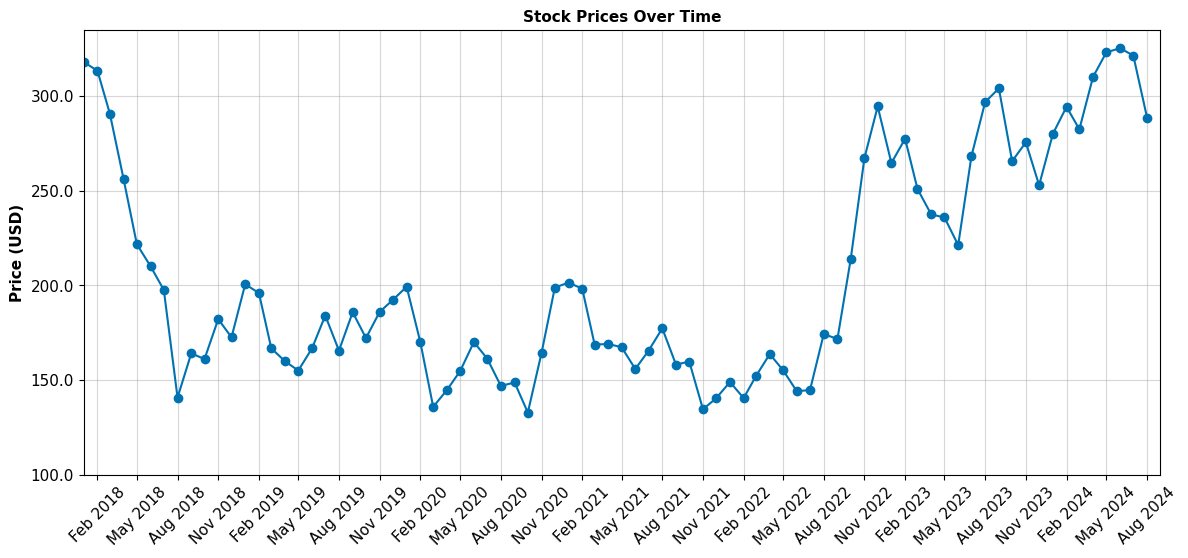

In [68]:
# Convert 'Date' column to datetime format
df_stock['Date'] = pd.to_datetime(df_stock['Date'])

# Remove any currency symbols or commas from 'Price_Stock_Ex' and convert to numeric
df_stock['Price_Stock_Ex'] = df_stock['Price_Stock_Ex'].replace('[\$,]', '', regex=True)
df_stock['Price_Stock_Ex'] = pd.to_numeric(df_stock['Price_Stock_Ex'], errors='coerce')

# Drop rows with missing or invalid 'Price_Stock_Ex' values
df_stock = df_stock.dropna(subset=['Price_Stock_Ex'])

# Filter the dataset for the specified date range (January 2018 to August 2024)
start_date = '2018-01-01'
end_date = '2024-08-31'
df_stock = df_stock[(df_stock['Date'] >= start_date) & (df_stock['Date'] <= end_date)]

# Sort the dataset by 'Date' for proper chronological plotting
df_stock = df_stock.sort_values(by='Date')

# Calculate the range of 'Price_Stock_Ex' and set y-ticks at intervals of 50
min_price = df_stock['Price_Stock_Ex'].min()
max_price = df_stock['Price_Stock_Ex'].max()
y_tick_step = 50
y_ticks = list(range(
    int(min_price // y_tick_step) * y_tick_step,  # Start of y-tick range
    int(max_price // y_tick_step) * y_tick_step + y_tick_step,  # End of y-tick range
    y_tick_step  # Step size for y-ticks
))

# Create a new figure for the plot
plt.figure(figsize=(12, 6))

# Plot the stock prices over time
plt.plot(
    df_stock['Date'],  # x-axis: dates
    df_stock['Price_Stock_Ex'],  # y-axis: stock prices
    marker='o',  # Circle markers for data points
    linestyle='-',  # Solid line connecting the points
    color='#0072B2'  # Blue line color
)

# Set the title and labels with bold text
plt.title('Stock Prices Over Time', fontsize=11, fontweight='bold')
plt.ylabel('Price (USD)', fontsize=11, fontweight='bold')

# Configure y-ticks using calculated values and set font size
plt.yticks(y_ticks, fontsize=11)

# Rotate x-axis tick labels for better readability
plt.xticks(rotation=45, fontsize=11)

# Format y-axis labels to one decimal place
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

# Configure x-axis tick locator and formatter for better date representation
locator = mdates.MonthLocator(interval=3)  # Show a tick every 3 months
formatter = mdates.DateFormatter('%b %Y')  # Format dates as "Month Year"
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

# Set the x-axis limits to the specified date range
plt.xlim([datetime(2018, 1, 1), datetime(2024, 8, 31)])

# Add grid lines with some transparency
plt.grid(True, alpha=0.5)

# Adjust the layout to prevent overlap and ensure better spacing
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

# Save the plot as a PNG file
file_name = 'stock_prices.png'
save_path = os.path.join(figures_path, file_name)
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

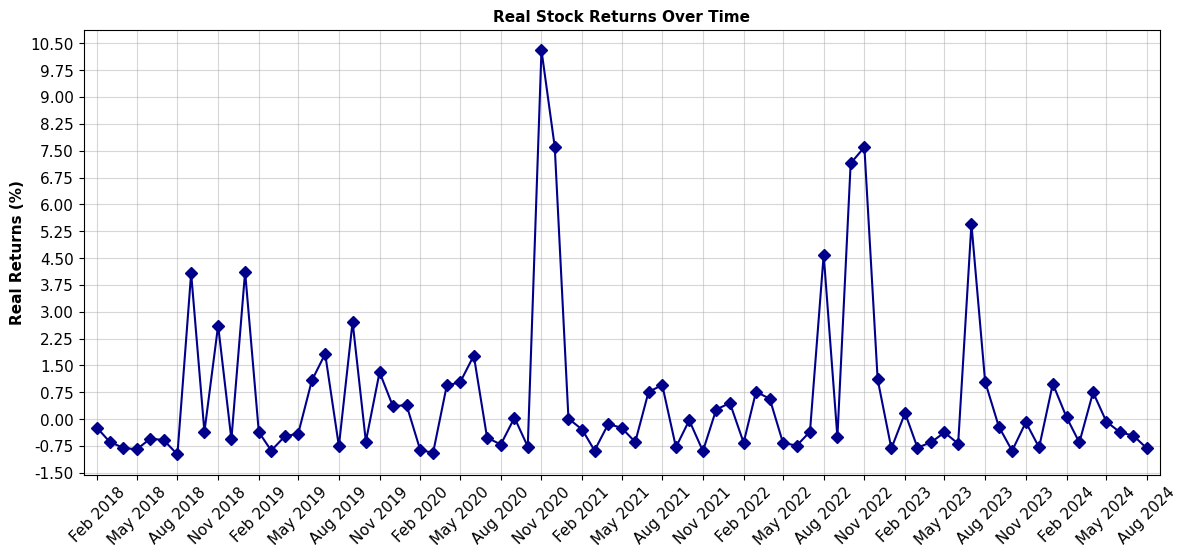

In [71]:
# Define the step size for y-axis ticks
y_tick_step = 0.75

# Get the minimum and maximum values of 'real_return_stockex' for y-axis range
min_price = df_stock['real_return_stockex'].min()
max_price = df_stock['real_return_stockex'].max()

# Calculate y-ticks using numpy's arange, ensuring evenly spaced ticks
y_ticks = np.arange(
    np.floor(min_price / y_tick_step) * y_tick_step,  # Start at the nearest lower multiple of y_tick_step
    np.ceil(max_price / y_tick_step) * y_tick_step + y_tick_step,  # End at the nearest upper multiple of y_tick_step
    y_tick_step  # Step size for ticks
)

# Create a figure with a specified size
plt.figure(figsize=(12, 6))

# Plot the real stock returns over time
plt.plot(
    df_stock['Date'],  # x-axis: Date column
    df_stock['real_return_stockex'],  # y-axis: real return of stock exchange
    marker='D',  # Diamond markers for data points
    color='darkblue'  # Use dark blue color for the line
)

# Set the title and y-axis label with bold formatting
plt.title('Real Stock Returns Over Time', fontsize=11, fontweight='bold')
plt.ylabel('Real Returns (%)', fontsize=11, fontweight='bold')

# Apply y-ticks based on calculated values
plt.yticks(y_ticks, fontsize=11)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, fontsize=11)

# Format y-axis values to two decimal places
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# Configure x-axis ticks to appear every 3 months
locator = mdates.MonthLocator(interval=3)  # Set tick intervals to every 3 months
formatter = mdates.DateFormatter('%b %Y')  # Format x-axis labels as "Month Year"
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

# Set x-axis limits to the specified date range
plt.xlim([datetime(2018, 1, 1), datetime(2024, 8, 31)])

# Add grid lines with transparency for better visibility
plt.grid(True, alpha=0.5)

# Adjust the layout to prevent overlaps
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

# Save the plot as a PNG file
file_name = 'real_stock_return.png'
save_path = os.path.join(figures_path, file_name)
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

## VISUALS FOR GOLD:

In [52]:
df_gold = pd.read_sql_query("SELECT * from GOLD", conn)

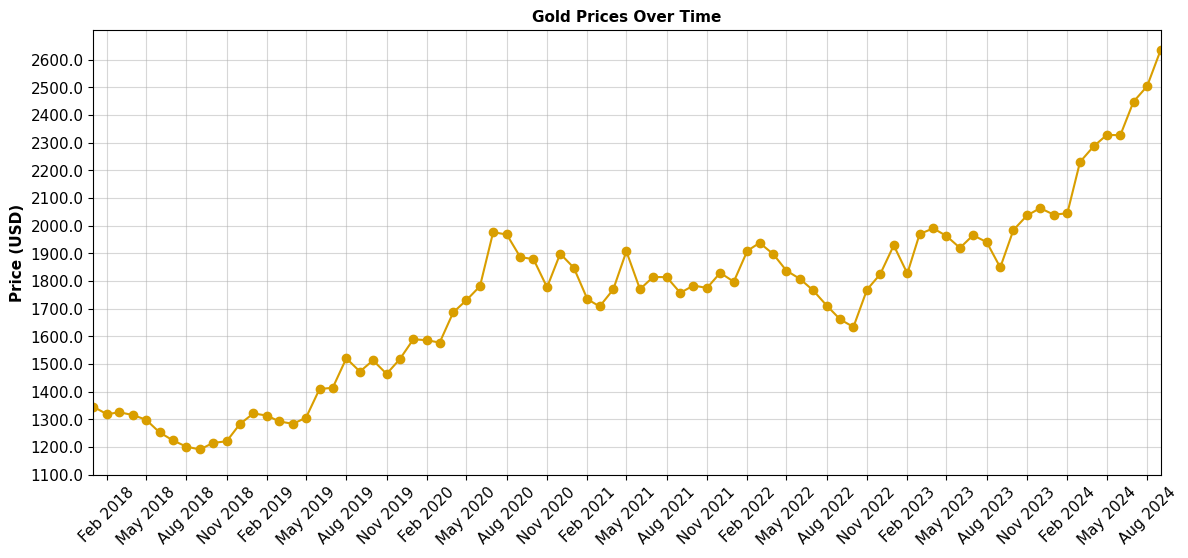

In [73]:
# Convert the 'Date' column to datetime format with the specified format '%Y-%m'
df_gold['Date'] = pd.to_datetime(df_gold['Date'], format='%Y-%m')

# Convert the 'Price_Gold' column to numeric, coercing invalid values to NaN
df_gold['Price_Gold'] = pd.to_numeric(df_gold['Price_Gold'], errors='coerce')

# Sort the DataFrame by the 'Date' column to ensure chronological order
df_gold = df_gold.sort_values(by='Date')

# Determine the minimum and maximum prices for y-axis range
min_price = df_gold['Price_Gold'].min()
max_price = df_gold['Price_Gold'].max()

# Define the step size for y-ticks and calculate the y-tick values
y_tick_step = 100
y_ticks = list(range(
    int(min_price // y_tick_step) * y_tick_step,  # Start at the nearest lower multiple of y_tick_step
    int(max_price // y_tick_step) * y_tick_step + y_tick_step,  # End at the nearest upper multiple of y_tick_step
    y_tick_step  # Step size for the ticks
))

# Create a new figure for the plot with specified dimensions
plt.figure(figsize=(12, 6))

# Plot the gold prices over time
plt.plot(
    df_gold['Date'],  # x-axis: Date column
    df_gold['Price_Gold'],  # y-axis: Gold price column
    marker='o',  # Use circle markers for the data points
    linestyle='-',  # Connect data points with a solid line
    color='#D99E00'  # Set line color to gold
)

# Set the title and y-axis label with bold text formatting
plt.title('Gold Prices Over Time', fontsize=11, fontweight='bold')
plt.ylabel('Price (USD)', fontsize=11, fontweight='bold')

# Set the y-ticks using the calculated range and adjust font size
plt.yticks(y_ticks, fontsize=11)

# Rotate x-axis tick labels for better readability and set their font size
plt.xticks(rotation=45, fontsize=11)

# Format the y-axis values to one decimal place
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

# Configure x-axis ticks to appear every 3 months
locator = mdates.MonthLocator(interval=3)  # Tick every 3 months
formatter = mdates.DateFormatter('%b %Y')  # Format x-axis labels as "Month Year"
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

# Set the x-axis limits to the full range of dates in the dataset
plt.xlim([df_gold['Date'].min(), df_gold['Date'].max()])

# Add grid lines with some transparency for better readability
plt.grid(True, alpha=0.5)

# Adjust layout to prevent overlap and ensure proper spacing
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

# Save the plot as a PNG file in the specified directory
file_name = 'gold_prices.png'
save_path = os.path.join(figures_path, file_name)
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

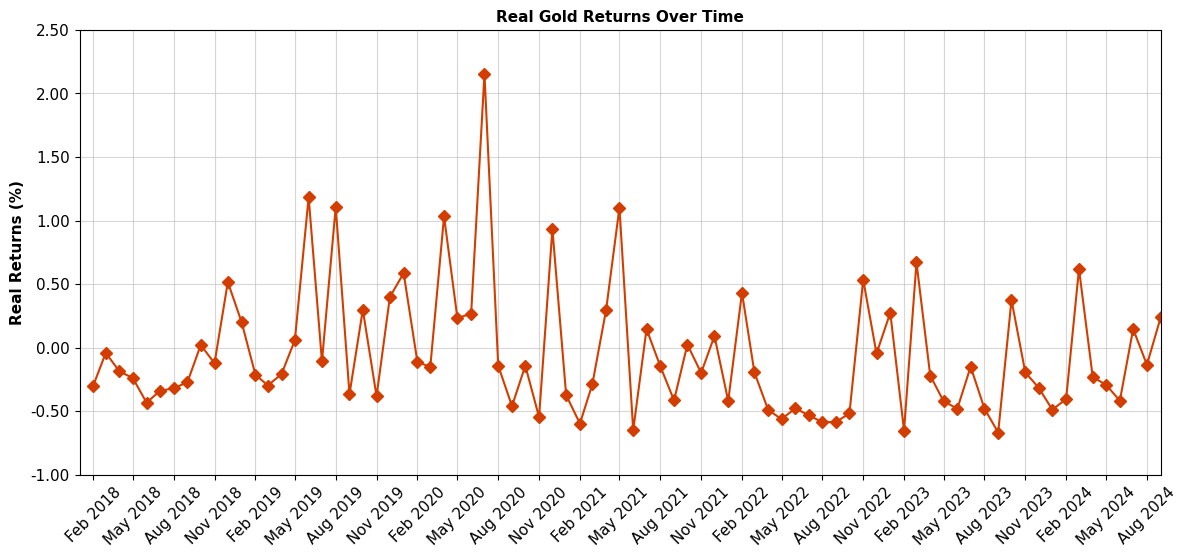

In [74]:
# Set up locators and formatters for the x-axis
locator = mdates.MonthLocator(interval=3)  # Tick every 3 months
formatter = mdates.DateFormatter('%b %Y')  # Format x-axis labels as "Month Year"

# Create a new figure with specified dimensions
plt.figure(figsize=(12, 6))

# Plot the real gold returns over time
plt.plot(
    df_gold['Date'],  # x-axis: Date column
    df_gold['real_return_gold'],  # y-axis: Real gold returns
    marker='D',  # Use diamond markers for data points
    color='#D33E00'  # Use red color for the line
)

# Calculate the y-axis range and tick values
min_price = df_gold['real_return_gold'].min()  # Minimum return
max_price = df_gold['real_return_gold'].max()  # Maximum return
y_tick_step = 0.5  # Step size for y-ticks
y_ticks = np.arange(
    np.floor(min_price / y_tick_step) * y_tick_step,  # Start at the nearest lower multiple of y_tick_step
    np.ceil(max_price / y_tick_step) * y_tick_step + y_tick_step,  # End at the nearest upper multiple of y_tick_step
    y_tick_step  # Step size for the ticks
)

# Set the title and y-axis label with bold formatting
plt.title('Real Gold Returns Over Time', fontsize=11, fontweight='bold')
plt.ylabel('Real Returns (%)', fontsize=11, fontweight='bold')

# Apply y-ticks and set font size
plt.yticks(y_ticks, fontsize=11)

# Rotate x-axis labels for better readability and set their font size
plt.xticks(rotation=45, fontsize=11)

# Format y-axis values to two decimal places
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# Configure x-axis ticks using the defined locator and formatter
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

# Set the x-axis limits to the full range of dates in the dataset
plt.xlim([df_gold['Date'].min(), df_gold['Date'].max()])

# Add grid lines with some transparency for better readability
plt.grid(True, alpha=0.5)

# Adjust layout to prevent overlap and ensure proper spacing
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

# Save the plot as a PNG file in the specified directory
file_name = 'real_gold_returns.png'
save_path = os.path.join(figures_path, file_name)
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

## VISUALS FOR BOND:

In [55]:
df_gov_bond = pd.read_sql_query("SELECT * from BOND", conn)

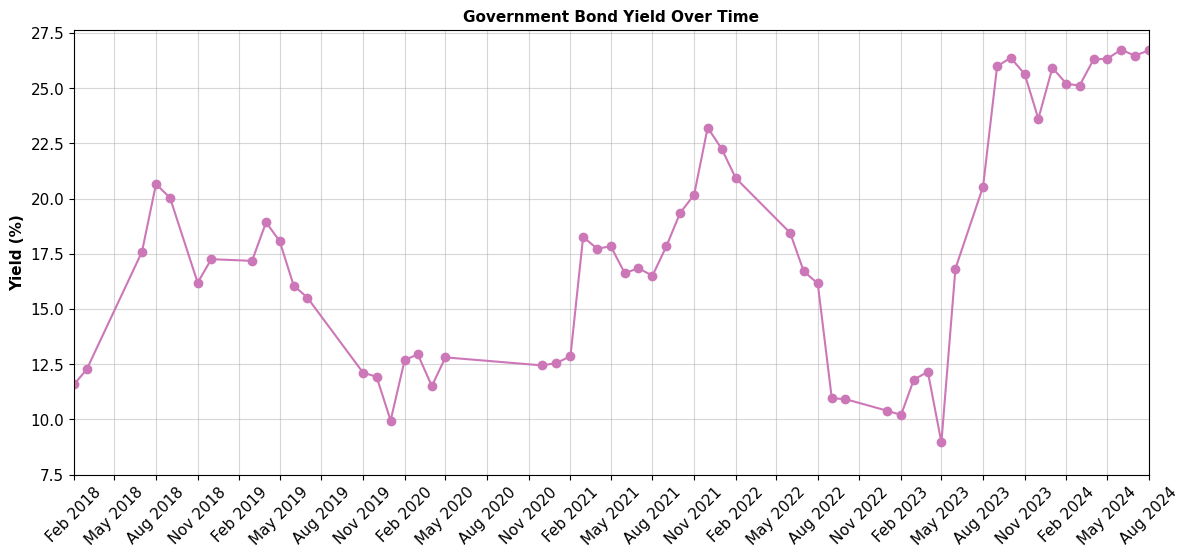

In [76]:
# Define required dates to ensure the dataset includes these key points
required_dates = pd.to_datetime(['2018-02', '2024-08'], format='%Y-%m')

# Convert 'Date' column to datetime format, handling errors gracefully
df_gov_bond['Date'] = pd.to_datetime(df_gov_bond['Date'], format='%Y-%m', errors='coerce')

# Check if required dates are missing in the 'Date' column
for date in required_dates:
    if date not in df_gov_bond['Date'].values:
        # If a date is missing, add it with NaN for 'Gov_Bond_Yield'
        df_gov_bond = pd.concat(
            [df_gov_bond, pd.DataFrame({'Date': [date], 'Gov_Bond_Yield': [np.nan]})],
            ignore_index=True
        )

# Sort the DataFrame by date and reset the index
df_gov_bond = df_gov_bond.sort_values(by='Date').reset_index(drop=True)

# Determine the range for y-axis ticks based on the bond yield values
min_price = df_gov_bond['Gov_Bond_Yield'].min()
max_price = df_gov_bond['Gov_Bond_Yield'].max()

# Define the step size for y-ticks and calculate the tick values
y_tick_step = 2.5
y_ticks = np.arange(
    np.floor(min_price / y_tick_step) * y_tick_step,  # Start at the nearest lower multiple of y_tick_step
    np.ceil(max_price / y_tick_step) * y_tick_step + y_tick_step,  # End at the nearest upper multiple
    y_tick_step  # Step size for ticks
)

# Create a new figure with the specified dimensions
plt.figure(figsize=(12, 6))

# Plot the government bond yields over time
plt.plot(
    df_gov_bond['Date'],  # x-axis: Date
    df_gov_bond['Gov_Bond_Yield'],  # y-axis: Bond yields
    marker='o',  # Use circle markers for data points
    linestyle='-',  # Connect data points with a solid line
    color='#CC77B7'  # Set line color to purple
)

# Set the title and y-axis label with bold formatting
plt.title('Government Bond Yield Over Time', fontsize=11, fontweight='bold')
plt.ylabel('Yield (%)', fontsize=11, fontweight='bold')

# Set the y-ticks using the calculated values and adjust font size
plt.yticks(y_ticks, fontsize=11)

# Rotate x-axis labels for better readability and adjust font size
plt.xticks(rotation=45, fontsize=11)

# Format the y-axis values to one decimal place
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

# Configure x-axis ticks using a locator and formatter for monthly intervals
locator = mdates.MonthLocator(interval=3)  # Tick every 3 months
formatter = mdates.DateFormatter('%b %Y')  # Format x-axis labels as "Month Year"
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

# Set x-axis limits to the required date range
plt.xlim([pd.Timestamp('2018-02'), pd.Timestamp('2024-08')])

# Add grid lines with some transparency for readability
plt.grid(True, alpha=0.5)

# Adjust the layout to prevent overlap and ensure proper spacing
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

# Save the plot as a PNG file in the specified directory
file_name = 'gov_bond_yields.png'
save_path = os.path.join(figures_path, file_name)
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

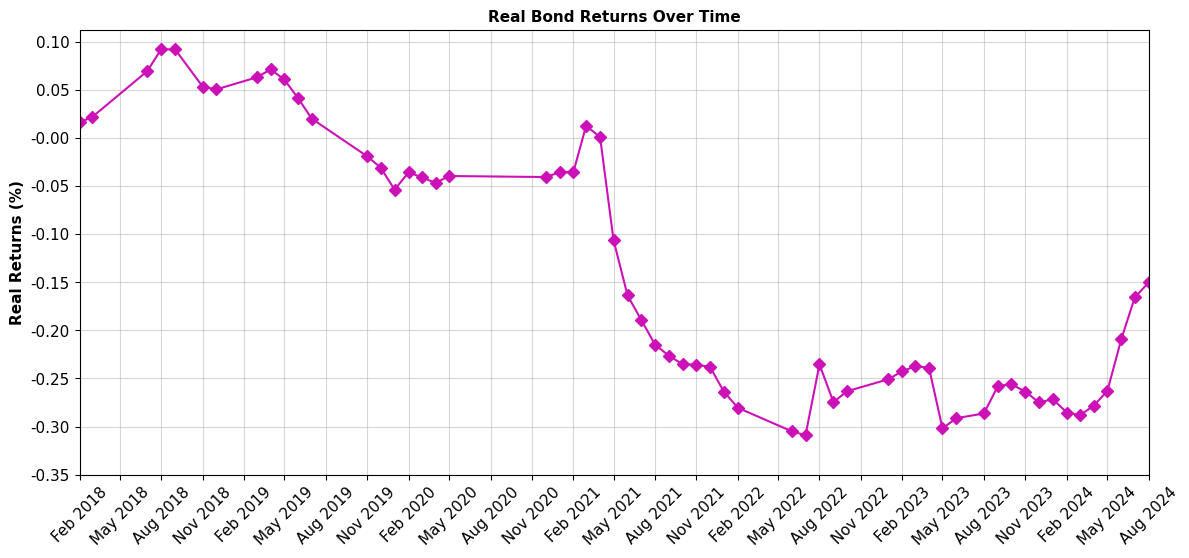

In [78]:
# Set up locators and formatters for the x-axis
locator = mdates.MonthLocator(interval=3)  # Set ticks every 3 months
formatter = mdates.DateFormatter('%b %Y')  # Format x-axis labels as "Month Year"

# Create a new figure with specified dimensions
plt.figure(figsize=(12, 6))

# Plot the real bond returns over time
plt.plot(
    df_gov_bond['Date'],  # x-axis: Date column
    df_gov_bond['real_return_bond'],  # y-axis: Real bond returns
    marker='D',  # Use diamond markers for data points
    color='#CC11B7'  # Set line color to purple
)

# Calculate the y-axis range and tick values
min_price = df_gov_bond['real_return_bond'].min()  # Minimum return
max_price = df_gov_bond['real_return_bond'].max()  # Maximum return
y_tick_step = 0.05  # Step size for y-ticks
y_ticks = np.arange(
    np.floor(min_price / y_tick_step) * y_tick_step,  # Start at the nearest lower multiple of y_tick_step
    np.ceil(max_price / y_tick_step) * y_tick_step + y_tick_step,  # End at the nearest upper multiple
    y_tick_step  # Step size for the ticks
)

# Set the title and y-axis label with bold formatting
plt.title('Real Bond Returns Over Time', fontsize=11, fontweight='bold')
plt.ylabel('Real Returns (%)', fontsize=11, fontweight='bold')

# Apply y-ticks using the calculated range and adjust font size
plt.yticks(y_ticks, fontsize=11)

# Rotate x-axis labels for better readability and adjust font size
plt.xticks(rotation=45, fontsize=11)

# Format the y-axis values to two decimal places
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# Configure x-axis ticks using the defined locator and formatter
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

# Set the x-axis limits to the required date range
plt.xlim([pd.Timestamp('2018-02'), pd.Timestamp('2024-08')])

# Add grid lines with some transparency for better readability
plt.grid(True, alpha=0.5)

# Adjust layout to prevent overlap and ensure proper spacing
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

# Save the plot as a PNG file in the specified directory
file_name = 'real_bond_returns.png'
save_path = os.path.join(figures_path, file_name)
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

## VISUALS FOR HPI:

In [60]:
df_hpi = pd.read_sql_query("SELECT * from HPI", conn)

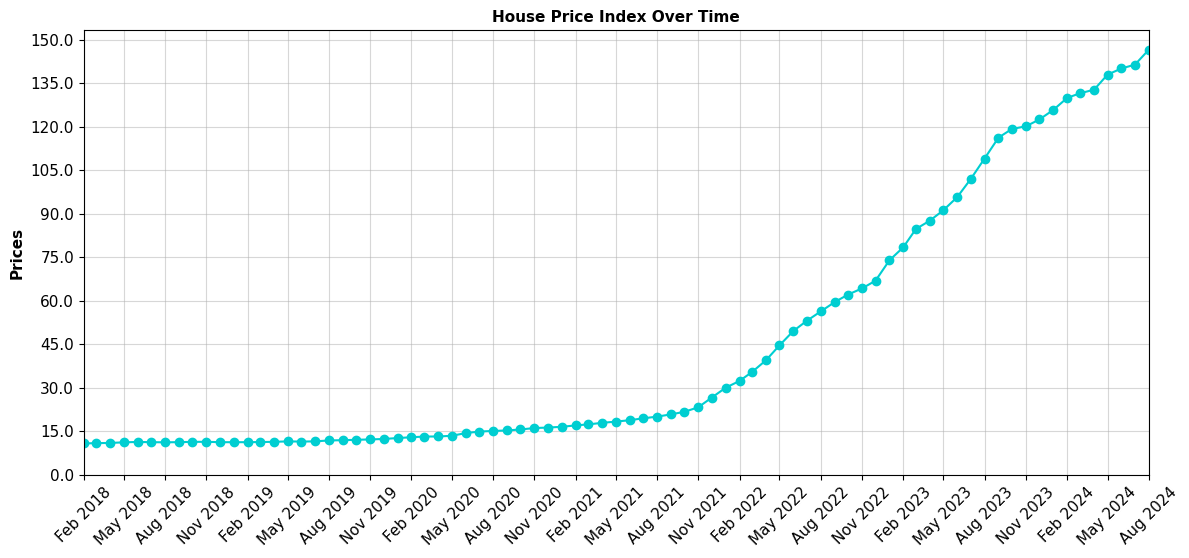

In [79]:
# Define the required dates to ensure the dataset includes these specific points
required_dates = pd.to_datetime(['2018-02', '2024-08'], format='%Y-%m')

# Convert the 'Date' column in df_hpi to datetime format, handling invalid parsing as NaT
df_hpi['Date'] = pd.to_datetime(df_hpi['Date'], format='%Y-%m', errors='coerce')

# Check if required dates are missing in the 'Date' column
for date in required_dates:
    if date not in df_hpi['Date'].values:
        # Add missing dates with NaN for 'House Price Index'
        df_hpi = pd.concat(
            [df_hpi, pd.DataFrame({'Date': [date], 'House Prince Index': [np.nan]})],
            ignore_index=True
        )

# Sort the dataset by date and reset the index
df_hpi = df_hpi.sort_values(by='Date').reset_index(drop=True)

# Calculate the range for y-axis ticks based on the house price index values
min_price = df_hpi['TP KFE TR'].min()  # Minimum value of the index
max_price = df_hpi['TP KFE TR'].max()  # Maximum value of the index

# Define the step size for y-ticks and calculate the tick values
y_tick_step = 15
y_ticks = np.arange(
    np.floor(min_price / y_tick_step) * y_tick_step,  # Start at the nearest lower multiple of y_tick_step
    np.ceil(max_price / y_tick_step) * y_tick_step + y_tick_step,  # End at the nearest upper multiple
    y_tick_step  # Step size for ticks
)

# Create a new figure for the plot with specified dimensions
plt.figure(figsize=(12, 6))

# Plot the house price index over time
plt.plot(
    df_hpi['Date'],  # x-axis: Date column
    df_hpi['TP KFE TR'],  # y-axis: House Price Index
    marker='o',  # Use circle markers for data points
    linestyle='-',  # Connect data points with a solid line
    color='#00CED1'  # Set line color to turquoise
)

# Set the title and y-axis label with bold formatting
plt.title('House Price Index Over Time', fontsize=11, fontweight='bold')
plt.ylabel('Prices', fontsize=11, fontweight='bold')

# Apply y-ticks using the calculated range and adjust font size
plt.yticks(y_ticks, fontsize=11)

# Rotate x-axis labels for better readability and set font size
plt.xticks(rotation=45, fontsize=11)

# Format the y-axis values to one decimal place
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

# Configure x-axis ticks using the defined locator and formatter
locator = mdates.MonthLocator(interval=3)  # Set ticks every 3 months
formatter = mdates.DateFormatter('%b %Y')  # Format x-axis labels as "Month Year"
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

# Set x-axis limits to the required date range
plt.xlim([pd.Timestamp('2018-02'), pd.Timestamp('2024-08')])

# Add grid lines with transparency for readability
plt.grid(True, alpha=0.5)

# Adjust layout to prevent overlaps and ensure proper spacing
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

# Save the plot as a PNG file in the specified directory
file_name = 'hpi_prices.png'
save_path = os.path.join(figures_path, file_name)
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

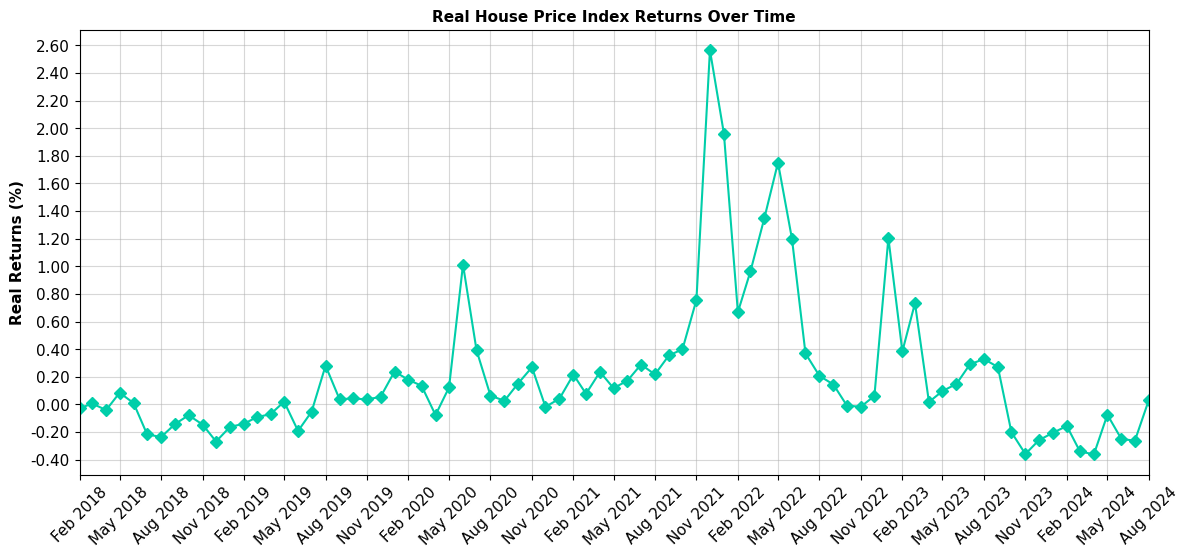

In [82]:
# Set up locators and formatters for the x-axis
locator = mdates.MonthLocator(interval=3)  # Set ticks every 3 months
formatter = mdates.DateFormatter('%b %Y')  # Format x-axis labels as "Month Year"

# Create a new figure with specified dimensions
plt.figure(figsize=(12, 6))

# Plot the real house price index returns over time
plt.plot(
    df_hpi['Date'],  # x-axis: Date column
    df_hpi['real_return_hpi'],  # y-axis: Real returns of house price index
    marker='D',  # Use diamond markers for data points
    color='#00CEA9'  # Set line color to turquoise
)

# Calculate the y-axis range and tick values
min_price = df_hpi['real_return_hpi'].min()  # Minimum real return
max_price = df_hpi['real_return_hpi'].max()  # Maximum real return
y_tick_step = 0.20  # Step size for y-ticks
y_ticks = np.arange(
    np.floor(min_price / y_tick_step) * y_tick_step,  # Start at the nearest lower multiple of y_tick_step
    np.ceil(max_price / y_tick_step) * y_tick_step + y_tick_step,  # End at the nearest upper multiple
    y_tick_step  # Step size for the ticks
)

# Set the title and y-axis label with bold formatting
plt.title('Real House Price Index Returns Over Time', fontsize=11, fontweight='bold')
plt.ylabel('Real Returns (%)', fontsize=11, fontweight='bold')

# Apply y-ticks using the calculated range and adjust font size
plt.yticks(y_ticks, fontsize=11)

# Rotate x-axis labels for better readability and set font size
plt.xticks(rotation=45, fontsize=11)

# Format the y-axis values to two decimal places
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# Configure x-axis ticks using the defined locator and formatter
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

# Set x-axis limits to the full range of dates in the dataset
plt.xlim([pd.Timestamp('2018-02'), pd.Timestamp('2024-08')])

# Add grid lines with transparency for readability
plt.grid(True, alpha=0.5)

# Adjust layout to prevent overlaps and ensure proper spacing
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

# Save the plot as a PNG file in the specified directory
file_name = 'real_hpi_returns.png'
save_path = os.path.join(figures_path, file_name)
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

## VISUALS FOR BITCOIN:

In [83]:
df_btc = pd.read_sql_query("SELECT * from BTC", conn)

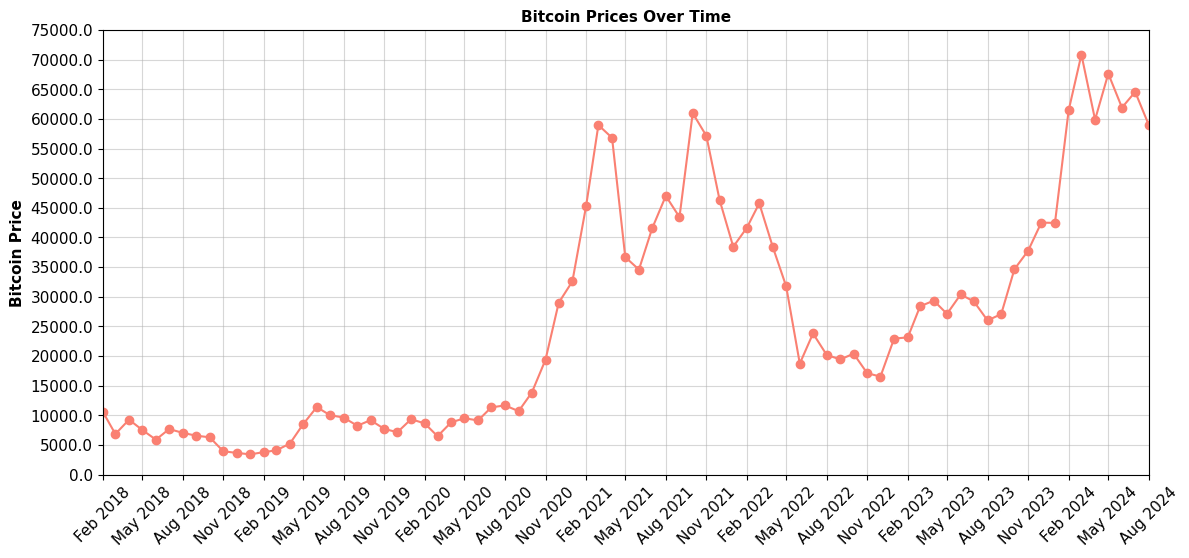

In [84]:
# Convert 'Price_Bitcoin' to numeric, coercing invalid values to NaN
df_btc["Price_Bitcoin"] = pd.to_numeric(df_btc["Price_Bitcoin"], errors='coerce')

# Ensure the 'Date' column is in datetime format, handling invalid parsing as NaT
df_btc["Date"] = pd.to_datetime(df_btc["Date"], errors='coerce')

# Calculate the minimum and maximum Bitcoin prices for y-axis range
min_price = df_btc["Price_Bitcoin"].min()
max_price = df_btc["Price_Bitcoin"].max()

# Define the step size for y-ticks and calculate the tick values
y_tick_step = 5000
y_ticks = np.arange(
    np.floor(min_price / y_tick_step) * y_tick_step,  # Start at the nearest lower multiple of y_tick_step
    np.ceil(max_price / y_tick_step) * y_tick_step + y_tick_step,  # End at the nearest upper multiple
    y_tick_step  # Step size for the ticks
)

# Create a new figure with the specified dimensions
plt.figure(figsize=(12, 6))

# Plot the Bitcoin prices over time
plt.plot(
    df_btc['Date'],  # x-axis: Date column
    df_btc["Price_Bitcoin"],  # y-axis: Bitcoin price
    marker='o',  # Use circle markers for data points
    linestyle='-',  # Connect data points with a solid line
    color='#FA8072'  # Set line color to salmon
)

# Set the title and y-axis label with bold formatting
plt.title('Bitcoin Prices Over Time', fontsize=11, fontweight='bold')
plt.ylabel('Bitcoin Price', fontsize=11, fontweight='bold')

# Apply y-ticks using the calculated range and adjust font size
plt.yticks(y_ticks, fontsize=11)

# Rotate x-axis labels for better readability and adjust font size
plt.xticks(rotation=45, fontsize=11)

# Format the y-axis values to one decimal place
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f'))

# Configure x-axis ticks using a locator and formatter
locator = mdates.MonthLocator(interval=3)  # Set ticks every 3 months
formatter = mdates.DateFormatter('%b %Y')  # Format x-axis labels as "Month Year"
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

# Set x-axis limits to the desired range
plt.xlim([pd.Timestamp('2018-02-01'), pd.Timestamp('2024-08-01')])

# Add grid lines with transparency for readability
plt.grid(True, alpha=0.5)

# Adjust layout to prevent overlaps and ensure proper spacing
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

# Save the plot as a PNG file in the specified directory
file_name = 'bitcoin_prices.png'
save_path = os.path.join(figures_path, file_name)
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

The following points were omitted due to being outliers:
         Date  real_return_bitcoin
45 2020-12-01           109.192421
64 2019-05-01           288.248727


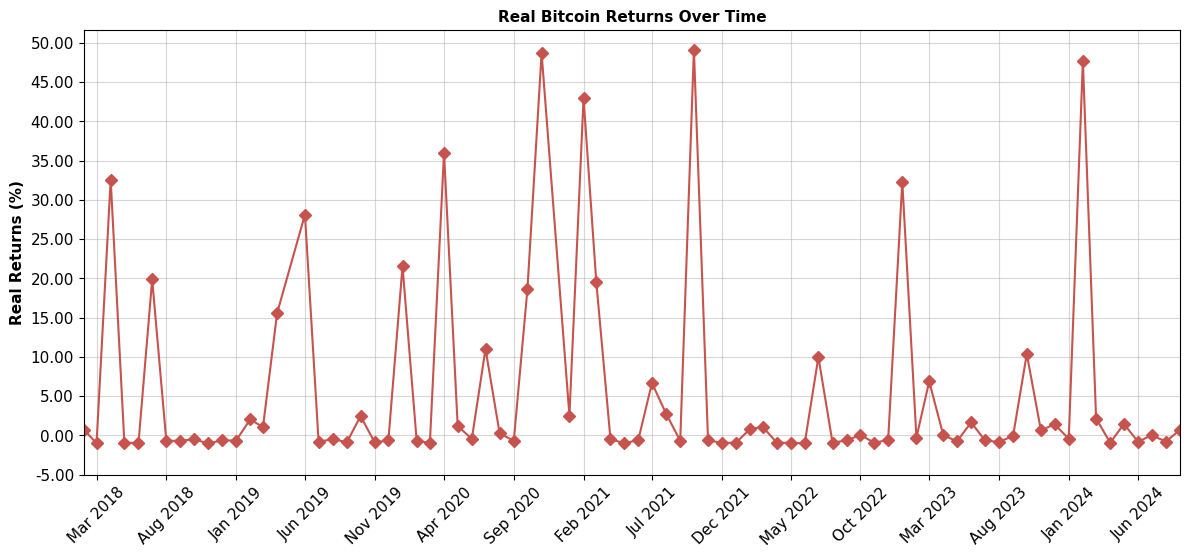

In [85]:
# Identify outliers: rows where 'real_return_bitcoin' is below -10% or above 50%
outliers = df_btc[(df_btc['real_return_bitcoin'] < -10) | (df_btc['real_return_bitcoin'] > 50)]

# Filter out the outliers for the main dataset
df_filtered = df_btc[(df_btc['real_return_bitcoin'] >= -10) & (df_btc['real_return_bitcoin'] <= 50)]

# If outliers exist, print them for reference
if not outliers.empty:
    print("The following points were omitted due to being outliers:")
    print(outliers[['Date', 'real_return_bitcoin']])

# Configure locators and formatters for the x-axis
locator = mdates.MonthLocator(interval=5)  # Set ticks every 5 months
formatter = mdates.DateFormatter('%b %Y')  # Format x-axis labels as "Month Year"

# Create a new figure with the specified dimensions
plt.figure(figsize=(12, 6))

# Plot the filtered real Bitcoin returns over time
plt.plot(
    df_filtered['Date'],  # x-axis: Date column
    df_filtered['real_return_bitcoin'],  # y-axis: Filtered real Bitcoin returns
    marker='D',  # Use diamond markers for data points
    color='#C6534D'  # Use red color for the line
)

# Define the y-axis tick range and step size
y_tick_step = 5  # Step size for y-ticks
min_price = df_filtered['real_return_bitcoin'].min()  # Minimum filtered return
max_price = df_filtered['real_return_bitcoin'].max()  # Maximum filtered return
y_ticks = np.arange(
    np.floor(min_price / y_tick_step) * y_tick_step,  # Start at the nearest lower multiple of y_tick_step
    np.ceil(max_price / y_tick_step) * y_tick_step + y_tick_step,  # End at the nearest upper multiple
    y_tick_step  # Step size for the ticks
)

# Set the title and y-axis label with bold formatting
plt.title('Real Bitcoin Returns Over Time', fontsize=11, fontweight='bold')
plt.ylabel('Real Returns (%)', fontsize=11, fontweight='bold')

# Apply y-ticks using the calculated range and adjust font size
plt.yticks(y_ticks, fontsize=11)

# Rotate x-axis labels for better readability and adjust font size
plt.xticks(rotation=45, fontsize=11)

# Format the y-axis values to two decimal places
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# Configure x-axis ticks using the defined locator and formatter
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

# Set x-axis limits to the filtered date range
plt.xlim([df_filtered['Date'].min(), df_filtered['Date'].max()])

# Add grid lines with transparency for readability
plt.grid(True, alpha=0.5)

# Adjust layout to prevent overlaps and ensure proper spacing
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

# Save the plot as a PNG file in the specified directory
file_name = 'real_bitcoin_returns.png'
save_path = os.path.join(figures_path, file_name)
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Display the plot
plt.show()

## Returns Merged: (HPI and Stock)

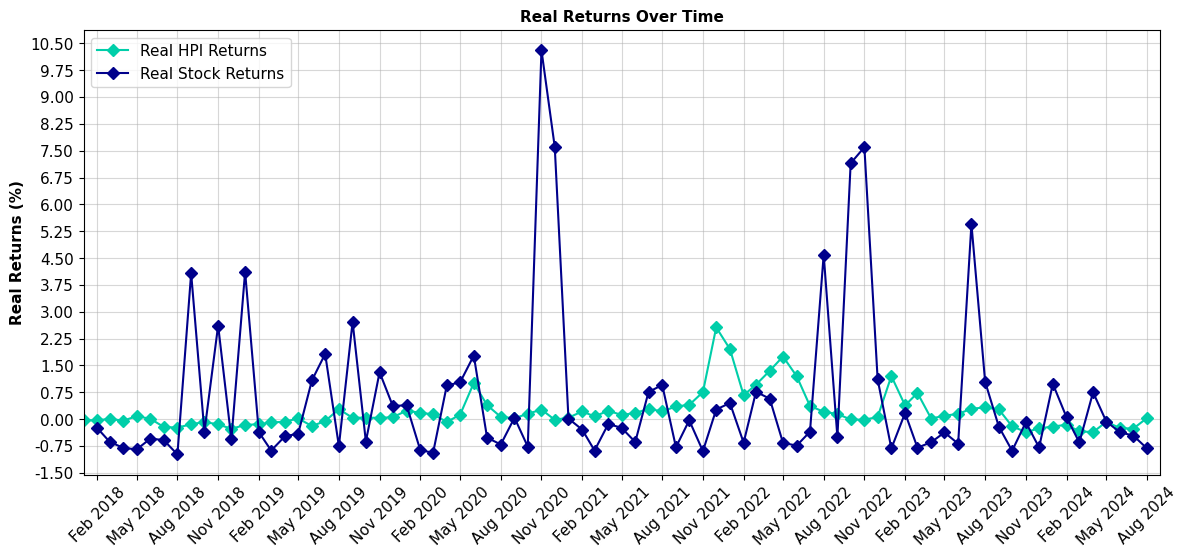

In [88]:
# Set up locators and formatters for the x-axis
locator = mdates.MonthLocator(interval=3)  # Set ticks every 3 months
formatter = mdates.DateFormatter('%b %Y')  # Format x-axis labels as "Month Year"

# Create a new figure with specified dimensions
plt.figure(figsize=(12, 6))

# Plot the real house price index returns over time
plt.plot(
    df_hpi['Date'],  # x-axis: Date column
    df_hpi['real_return_hpi'],  # y-axis: Real returns of house price index
    marker='D',  # Use diamond markers for data points
    color='#00CEA9',  # Set line color to turquoise
    label='Real HPI Returns'  # Label for legend
)

# Plot the real stock returns over time
plt.plot(
    df_stock['Date'],  # x-axis: Date column
    df_stock['real_return_stockex'],  # y-axis: Real returns of stock exchange
    marker='D',  # Use diamond markers for data points
    color='darkblue',  # Use dark blue color for the line
    label='Real Stock Returns'  # Label for legend
)

# Calculate the combined y-axis range and tick values
combined_min = min(df_hpi['real_return_hpi'].min(), df_stock['real_return_stockex'].min())
combined_max = max(df_hpi['real_return_hpi'].max(), df_stock['real_return_stockex'].max())
y_tick_step = 0.75  # Step size for y-ticks
y_ticks = np.arange(
    np.floor(combined_min / y_tick_step) * y_tick_step,  # Start at the nearest lower multiple
    np.ceil(combined_max / y_tick_step) * y_tick_step + y_tick_step,  # End at the nearest upper multiple
    y_tick_step  # Step size for the ticks
)

# Set the title and y-axis label with bold formatting
plt.title('Real Returns Over Time', fontsize=11, fontweight='bold')
plt.ylabel('Real Returns (%)', fontsize=11, fontweight='bold')

# Apply y-ticks using the calculated range and adjust font size
plt.yticks(y_ticks, fontsize=11)

# Rotate x-axis labels for better readability and set font size
plt.xticks(rotation=45, fontsize=11)

# Format y-axis values to two decimal places
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

# Configure x-axis ticks using the defined locator and formatter
ax = plt.gca()
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)

# Set x-axis limits to the full range of dates in the datasets
plt.xlim([datetime(2018, 1, 1), datetime(2024, 8, 31)])

# Add grid lines with transparency for readability
plt.grid(True, alpha=0.5)

# Add a legend to distinguish the lines
plt.legend(fontsize=11, loc='upper left')

# Adjust layout to prevent overlaps and ensure proper spacing
plt.tight_layout()
plt.subplots_adjust(bottom=0.2)

# Save the combined plot as a PNG file
file_name = 'real_combined_hpi_stock_returns.png'
save_path = os.path.join(figures_path, file_name)
plt.savefig(save_path, dpi=300, bbox_inches='tight')

# Display the plot
plt.show()